**Word-Break Problem**

Time Complexity: O(2^n). Because there are 2^n combinations in The Worst Case.

Auxiliary Space: O(n^2)

In [46]:
dictionary = {
    "mobile",
    "samsung",
    "sam",
    "sung",
    "man",
    "mango",
    "icecream",
    "and",
    "go",
    "i",
    "love",
    "ice",
    "cream",
}
pat = "iloveicecreamandmango"


def solve(pat, d, path):
    if len(pat) <= 0:
        print(path)
        return
    for j in range(1, len(pat) + 1):
        curr = pat[:j]
        if curr in d:
            path.append(curr)
            solve(pat[j:], d, path)
            path.pop()


solve(pat, dictionary, [])

['i', 'love', 'ice', 'cream', 'and', 'man', 'go']
['i', 'love', 'ice', 'cream', 'and', 'mango']
['i', 'love', 'icecream', 'and', 'man', 'go']
['i', 'love', 'icecream', 'and', 'mango']


In [47]:
pat = "iloveicecreamandmango"


def solve(pat, d, path):
    if len(pat) <= 0:
        print(path)
        return
    for j in range(1, len(pat) + 1):
        curr = pat[:j]
        if curr in d:
            solve(pat[j:], d, path + curr + " ")


solve(pat, dictionary, "")

i love ice cream and man go 
i love ice cream and mango 
i love icecream and man go 
i love icecream and mango 


In [48]:
pat = "iloveicecreamandmango"


def solve(pat, d):
    if len(pat) <= 0:
        return True
    for j in range(1, len(pat) + 1):
        curr = pat[:j]
        if curr in d and solve(pat[j:], d):
            return True
    return False


solve(pat, dictionary)

True

In [49]:
pat = "iloveicecreamandmango"


def solve(i, pat, d, path):
    if i >= len(pat):
        print(path)
        return

    for j in range(i + 1, len(pat) + 1):
        curr = pat[i:j]
        if curr in d:
            solve(j, pat, d, path + curr + " ")


solve(0, pat, dictionary, "")

i love ice cream and man go 
i love ice cream and mango 
i love icecream and man go 
i love icecream and mango 


**Print all Palindromic Partitions of a String**

In [50]:
def is_polindrom(x):
    return x == x[::-1]


def solve(pat, path):
    if len(pat) <= 0:
        print(path)
        return
    for j in range(1, len(pat) + 1):
        curr = pat[:j]
        if is_polindrom(curr):
            solve(pat[j:], path + curr + " ")


pat = "nitin"
solve(pat, "")

n i t i n 
n iti n 
nitin 


In [51]:
def is_polindrom(x):
    return x == x[::-1]


def solve(i, pat, path):
    if i >= len(pat):
        print(path)
        return
    for j in range(i + 1, len(pat) + 1):
        curr = pat[i:j]
        if is_polindrom(curr):
            solve(j, pat, path + curr + " ")


pat = "nitin"
solve(0, pat, "")

n i t i n 
n iti n 
nitin 


In [52]:
s = "??t"


def solve(i, s, curr):
    if len(curr) == len(s):
        print(curr)
        return
    if s[i] == "?":
        for c in "abcd":
            solve(i + 1, s, curr + c)
    else:
        solve(i + 1, s, curr + s[i])


solve(0, s, "")

aat
abt
act
adt
bat
bbt
bct
bdt
cat
cbt
cct
cdt
dat
dbt
dct
ddt


**Remove minimum number of parentheses to make the input string valid**

Time Complexity: O(2^n). Because there are 2^n combinations in The Worst Case.

Auxiliary Space: O(n^2)

In [53]:
from collections import deque


# Method checks if character is parenthesis(open
# or closed)
def isParenthesis(c):
    return (c == "(") or (c == ")")


# method returns true if contains valid
# parenthesis
def isValidString(str):
    cnt = 0
    for i in range(len(str)):
        if str[i] == "(":
            cnt += 1
        elif str[i] == ")":
            cnt -= 1
        if cnt < 0:
            return False
    return cnt == 0


# method to remove invalid parenthesis
def removeInvalidParenthesis(str):
    if len(str) == 0:
        return

    # visit set to ignore already visited
    visit = set()

    # queue to maintain BFS
    q = deque([])
    temp = 0
    level = 0

    # pushing given as starting node into queue
    q.append(str)
    visit.add(str)
    while len(q):
        str = q[0]
        q.popleft()
        if isValidString(str):
            print(str)

            # If answer is found, make level true
            # so that valid of only that level
            # are processed.
            level = True
        if level:
            continue
        for i in range(len(str)):
            if not isParenthesis(str[i]):
                continue

            # Removing parenthesis from str and
            # pushing into queue,if not visited already
            temp = str[0:i] + str[i + 1 :]
            if temp not in visit:
                q.append(temp)
                visit.add(temp)


# Driver Code
expression = "()())()"
removeInvalidParenthesis(expression)
expression = "()v)"
removeInvalidParenthesis(expression)

# This code is contributed by SHUBHAMSINGH10

(())()
()()()
(v)
()v


**string follows a given pattern or no**

Time complexity of this code is O(2^m), where m is the length of the pattern. This is because in the worst case, the algorithm may have to try all possible combinations of substrings of the string to find a match with the pattern. 

Space complexity is O(m), where m is the length of the pattern, as the mapping between the pattern and the string is stored in a hash map with m characters.

In [54]:
# Function to determine if given pattern matches with a string or not
def match(str, pat, dict, i=0, j=0):

    n = len(str)
    m = len(pat)

    # base condition
    if n < m:
        return False

    # if both pattern and the string reaches end
    if i == n and j == m:
        return True

    # if either string or pattern reaches end
    if i == n or j == m:
        return False

    # consider next character from the pattern
    curr = pat[j]

    # if the character is seen before
    if curr in dict:

        s = dict[curr]
        k = len(s)

        # ss stores next k characters of the given string
        if i + k < len(str):
            ss = str[i : i + k]
        else:
            ss = str[i:]

        # return false if next k characters doesn't match with s
        if ss != s:
            return False

        # recur for remaining characters if next k characters matches
        return match(str, pat, dict, i + k, j + 1)

    # process all remaining characters in the string if current
    # character is never seen before
    for k in range(1, n - i + 1):

        # insert substring formed by next k characters of the string
        # into the dictionary
        dict[curr] = str[i : i + k]

        # check if it leads to the solution
        if match(str, pat, dict, i + k, j + 1):
            return True

        # else backtrack - remove current character from the dictionary
        dict.pop(curr)

    return False


if __name__ == "__main__":

    # input string and pattern
    str = "GeeksforGeeks"
    pat = "GfG"

    # create a dictionary to store mappings between the pattern and string
    dict = {}

    # check for solution
    if match(str, pat, dict):
        print(dict)
    else:
        print("Solution doesn't exist")

# This code is contributed by Priyadarshini Kumari

{'G': 'Geeks', 'f': 'for'}


**Hamiltonian cycle**

**Sudoku Solver**

In [55]:
# the given number.
def used_in_row(arr, row, num):
    for i in range(9):
        if arr[row][i] == num:
            return True
    return False


def used_in_col(arr, col, num):
    for i in range(9):
        if arr[i][col] == num:
            return True
    return False


def used_in_box(arr, row, col, num):
    for i in range(3):
        for j in range(3):
            if arr[i + row][j + col] == num:
                return True
    return False


def check_location_is_safe(arr, row, col, num):

    # Check if 'num' is not already
    # placed in current row,
    # current column and current 3x3 box
    return not used_in_row(arr, row, num) and (
        not used_in_col(arr, col, num)
        and (not used_in_box(arr, row - row % 3, col - col % 3, num))
    )


def isValid(board, row: int, col: int, c: str) -> bool:
    for i in range(9):
        if board[i][col] == c:
            return False
        if board[row][i] == c:
            return False
        if board[3 * (row // 3) + i // 3][3 * (col // 3) + i % 3] == c:
            return False
    return True

In [56]:
grid = [
    [3, 0, 6, 5, 0, 8, 4, 0, 0],
    [5, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 8, 7, 0, 0, 0, 0, 3, 1],
    [0, 0, 3, 0, 1, 0, 0, 8, 0],
    [9, 0, 0, 8, 6, 3, 0, 0, 5],
    [0, 5, 0, 0, 9, 0, 6, 0, 0],
    [1, 3, 0, 0, 0, 0, 2, 5, 0],
    [0, 0, 0, 0, 0, 0, 0, 7, 4],
    [0, 0, 5, 2, 0, 6, 3, 0, 0],
]


def solveSudoku(board) -> bool:
    for i in range(len(board)):
        for j in range(len(board[0])):
            if board[i][j] == 0:
                for c in range(1, 10):
                    if check_location_is_safe(board, i, j, c):
                        board[i][j] = c
                        if solveSudoku(board):
                            return True
                        else:
                            board[i][j] = 0
                return False
    return True


if solveSudoku(grid):
    for i in range(9):
        for j in range(9):
            print(grid[i][j], end=" ")
        print()
    # print_grid(grid)
else:
    print("No solution exists")

3 1 6 5 7 8 4 9 2 
5 2 9 1 3 4 7 6 8 
4 8 7 6 2 9 5 3 1 
2 6 3 4 1 5 9 8 7 
9 7 4 8 6 3 1 2 5 
8 5 1 7 9 2 6 4 3 
1 3 8 9 4 7 2 5 6 
6 9 2 3 5 1 8 7 4 
7 4 5 2 8 6 3 1 9 


**M-coloring**

In [57]:
from collections import defaultdict


def safe(node, col, graph, color):
    for k in graph[node]:
        if color[k] == col:
            return False
    return True


def solve(node, n, m, graph, color):
    if node == n:
        return True
    for i in range(1, m + 1):
        if safe(node, i, graph, color):
            color[node] = i
            if solve(node + 1, n, m, graph, color):
                return True
            color[node] = 0
    return False


paths = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)]
graph = defaultdict(list)
for u, v in paths:
    graph[u].append(v)
    graph[v].append(u)
m = 3
n = 4
color = [0] * (n)
if solve(0, n, m, graph, color):
    print(color)

[1, 2, 3, 2]


**Rat in a Maze**

In [58]:
# Initialize a string direction which represents all the directions.
direction = "DLRU"

# Arrays to represent change in rows and columns
dr = [1, 0, 0, -1]
dc = [0, -1, 1, 0]

# Function to check if cell(row, col) is inside the maze
# and unblocked


def is_valid(row, col, n, maze):
    return 0 <= row < n and 0 <= col < n and maze[row][col] == 1


# Function to get all valid paths


def find_path(row, col, maze, n, ans, current_path):
    # If we reach the bottom right cell of the matrix, add
    # the current path to ans and return
    if row == n - 1 and col == n - 1:
        ans.append(current_path)
        return
    # Mark the current cell as blocked
    maze[row][col] = 0

    for i in range(4):
        # Find the next row based on the current row (row)
        # and the dr[] array
        next_row = row + dr[i]
        # Find the next column based on the current column
        # (col) and the dc[] array
        next_col = col + dc[i]

        # Check if the next cell is valid or not
        if is_valid(next_row, next_col, n, maze):
            current_path += direction[i]
            # Recursively call the find_path function for
            # the next cell
            find_path(next_row, next_col, maze, n, ans, current_path)
            # Remove the last direction when backtracking
            current_path = current_path[:-1]

    # Mark the current cell as unblocked
    maze[row][col] = 1


# Driver code
maze = [[1, 0, 0, 0], [1, 1, 0, 1], [1, 1, 0, 0], [0, 1, 1, 1]]

n = len(maze)
# List to store all the valid paths
result = []
# Store current path
current_path = ""

if maze[0][0] != 0 and maze[n - 1][n - 1] != 0:
    # Function call to get all valid paths
    find_path(0, 0, maze, n, result, current_path)

if not result:
    print(-1)
else:
    print(" ".join(result))

DDRDRR DRDDRR


**All permutation**

In [59]:
def permuteRec(s, idx):

    # Base case
    if idx == len(s) - 1:
        print(s)
        return

    for i in range(idx, len(s)):

        # Swapping
        s[i], s[idx] = s[idx], s[i]

        # First idx+1 characters fixed
        permuteRec(s, idx + 1)

        # Backtrack
        s[i], s[idx] = s[idx], s[i]


s = "abc"
permuteRec(list(s), 0)

['a', 'b', 'c']
['a', 'c', 'b']
['b', 'a', 'c']
['b', 'c', 'a']
['c', 'b', 'a']
['c', 'a', 'b']


**a source vertex in the graph and a number k, find if there is a simple path (without any cycle) starting from given source and ending at any other vertex such that the distance  is atleast ‘k’ length.**

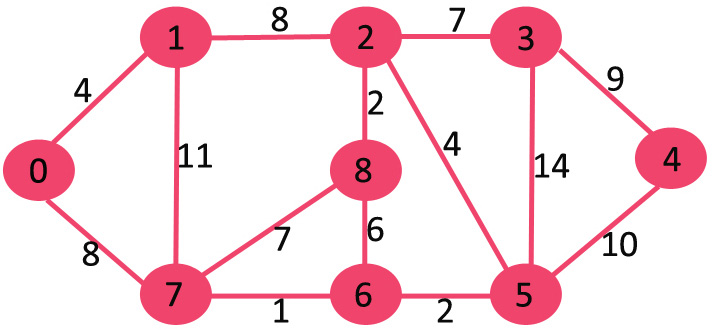

In [60]:
from typing import List, Tuple


class Graph:
    # Allocates memory for adjacency list
    def __init__(self, V):
        self.V = V
        self.adj = [[] for i in range(V)]

    def addEdge(self, u, v, w):
        self.adj[u].append([v, w])
        self.adj[v].append([u, w])


V = 9
g = Graph(V)
g.addEdge(0, 1, 4)
g.addEdge(0, 7, 8)
g.addEdge(1, 2, 8)
g.addEdge(1, 7, 11)
g.addEdge(2, 3, 7)
g.addEdge(2, 8, 2)
g.addEdge(2, 5, 4)
g.addEdge(3, 4, 9)
g.addEdge(3, 5, 14)
g.addEdge(4, 5, 10)
g.addEdge(5, 6, 2)
g.addEdge(6, 7, 1)
g.addEdge(6, 8, 6)
g.addEdge(7, 8, 7)


def dfs(
    i: int,
    adj: List[List[Tuple[int, int]]],
    visited: List[bool],
    k: int,
    cost: int,
    path: List[int],
) -> bool:
    visited[i] = True
    path.append(i)
    if cost >= k:
        print(path)
        return True
    for v, wt in adj[i]:
        if not visited[v]:
            # path.append(v)
            if dfs(v, adj, visited, k, cost + wt, path):
                return True
    path.pop()
    visited[i] = False
    return False


visited = [False] * V
k = 58
dfs(0, g.adj, visited, k, 0, [])

[0, 7, 1, 2, 3, 4, 5, 6, 8]


True

**calculate length of the shortest safe route possible from any cell in the first column to any cell in the last column of the matrix**

In [61]:
import sys
from collections import deque


def isValid(x, y, R, C):

    if x < R and y < C and x >= 0 and y >= 0:
        return True

    return False


def findPath(mat):
    R = len(mat)
    C = len(mat[0])

    rowNum = [-1, 0, 0, 1]
    colNum = [0, -1, 1, 0]

    for i in range(R):
        for j in range(C):
            # if a landmines is found
            if mat[i][j] == 0:
                # mark all adjacent cells
                for k in range(4):
                    x = i + rowNum[k]
                    y = j + colNum[k]
                    if isValid(x, y, R, C) and mat[x][y] != 0:
                        mat[x][y] = -1

    # mark all found adjacent cells as unsafe
    for i in range(R):
        for j in range(C):
            if mat[i][j] == -1:
                mat[i][j] = 0

    dist = [[-1 for i in range(C)] for j in range(R)]

    q = deque([])

    for i in range(R):
        if mat[i][0] == 1:
            q.append((i, 0))
            dist[i][0] = 0

    while len(q) != 0:
        k = q[0]
        q.popleft()

        x = k[0]
        y = k[1]

        d = dist[x][y]

        for k in range(4):
            xp = x + rowNum[k]
            yp = y + colNum[k]
            if isValid(xp, yp, R, C) and dist[xp][yp] == -1 and mat[xp][yp] == 1:
                dist[xp][yp] = d + 1
                q.append((xp, yp))

    # stores minimum cost of shortest path so far
    ans = sys.maxsize

    # start from first column and take minimum
    for i in range(R):
        if mat[i][C - 1] == 1 and dist[i][C - 1] != -1:
            ans = min(ans, dist[i][C - 1])
    if ans != sys.maxsize:
        return ans + 1
    return -1


mat = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
]
mat1 = [
    [1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1],
    [1, 1, 1, 1, 0],
]

# Find shortest path
findPath(mat1)

-1

In [62]:
mat = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 0, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]


def isValid(x, y, R, C):

    if x < R and y < C and x >= 0 and y >= 0:
        return True

    return False


R = len(mat)
C = len(mat[0])
visited = [[False for i in range(C)] for j in range(R)]


def findPath(i, j, mat, x, y):
    R = len(mat)
    C = len(mat[0])
    if i == x and y == j:
        return 0

    rowNum = [-1, 0, 0, 1]
    colNum = [0, -1, 1, 0]
    visited[i][j] = True
    path = 1
    for k in range(4):
        xp = i + rowNum[k]
        yp = j + colNum[k]
        if isValid(xp, yp, R, C) and mat[xp][yp] == 1 and visited[xp][yp] == False:
            path = max(path, 1 + findPath(xp, yp, mat, x, y))
    visited[i][j] = False
    return path


findPath(0, 0, mat, 1, 7)

25

**subsets of a given Set or Array**

In [63]:
def solve(index, a, path):
    if index >= len(a):
        print(path)
        return

    solve(index + 1, a, path)
    path.append(a[index])
    solve(index + 1, a, path)
    path.pop()


solve(0, [1, 2, 3], [])

[]
[3]
[2]
[2, 3]
[1]
[1, 3]
[1, 2]
[1, 2, 3]


In [64]:
def calcSubset(A, res, subset, index):
    # Add the current subset to the result list
    res.append(subset[:])

    # Generate subsets by recursively including and excluding elements
    for i in range(index, len(A)):
        # Include the current element in the subset
        subset.append(A[i])

        # Recursively generate subsets with the current element included
        calcSubset(A, res, subset, i + 1)

        # Exclude the current element from the subset (backtracking)
        subset.pop()


def subsets(A):
    subset = []
    res = []
    index = 0
    calcSubset(A, res, subset, index)
    return res


# Driver code
if __name__ == "__main__":
    array = [1, 2, 3]
    res = subsets(array)

    # Print the generated subsets
    for subset in res:
        print(*subset)


1
1 2
1 2 3
1 3
2
2 3
3


**find all its subsets. The subset can not contain duplicate elements, so any repeated subset should be considered only once in the output**

O(2^n * n)

In [65]:
def solve(index, a, path):
    if index >= len(a):
        print(path)
        return

    path.append(a[index])
    solve(index + 1, a, path)
    path.pop()

    while index + 1 < len(a) and a[index] == a[index + 1]:
        index += 1
    solve(index + 1, a, path)


a = [1, 3, 3]
a.sort()
solve(0, a, [])

[1, 3, 3]
[1, 3]
[1]
[3, 3]
[3]
[]


In [66]:
# Count ways to calculate a target from elements of a specified list
def countWays(nums, i, target):

    # base case: if a target is found
    if target == 0 and i == len(nums):
        return 1

    # base case: no elements are left
    if i == len(nums):
        return 0

    # 1. ignore the current element
    exclude = countWays(nums, i + 1, target)

    # 2. Consider the current element
    #    2.1. Subtract the current element from the target
    #    2.2. Add the current element to the target
    include = countWays(nums, i + 1, target - nums[i]) + countWays(
        nums, i + 1, target + nums[i]
    )

    # Return total count
    return exclude + include


if __name__ == "__main__":

    # input list and target number
    nums = [5, 3, -6, 2]
    target = 6

    print(countWays(nums, 0, target), "ways")

4 ways


In [67]:
def printList(list):
    for num, sign in list:
        print(f"({sign}){num} ", end=" ")
    print()


# Print all ways to calculate a target from elements of a specified list
def printWays(nums, i, target, auxlist):
    # base case: if a target is found, print the result list.
    if target == 0 and i == len(nums):
        printList(auxlist)

    # base case: no elements are left
    if i == len(nums):
        return

    # ignore the current element
    printWays(nums, i + 1, target, auxlist)

    # consider the current element and subtract it from the target
    auxlist.append((nums[i], "+"))
    printWays(nums, i + 1, target - nums[i], auxlist)
    auxlist.pop()  # backtrack

    # consider the current element and add it to the target
    auxlist.append((nums[i], "-"))
    printWays(nums, i + 1, target + nums[i], auxlist)
    auxlist.pop()  # backtrack


if __name__ == "__main__":
    # input list and target number
    nums = [5, 3, -6, 2]
    target = 6

    printWays(nums, 0, target, [])

(-)-6  
(+)5  (+)3  (-)2  
(+)5  (-)3  (-)-6  (-)2  
(-)5  (+)3  (-)-6  (+)2  


**Possible strings that can be made by placing spaces**

In [68]:
s = "ABC"
# st = list(s)


def solve(i, op, res, ip):
    if i == len(ip) - 1:
        op += ip[i]
        res.append(op)
        return
    # if i>=len(ip):
    #     res.append(op)
    #     return
    solve(i + 1, op + ip[i] + " ", res, ip)
    solve(i + 1, op + ip[i], res, ip)


def permutation(s):
    res = []
    op = ""
    solve(0, op, res, s)
    return res


permutation(s)

['A B C', 'A BC', 'AB C', 'ABC']

**Combination sum**

In [69]:
a = [2, 4, 6, 8]
x = 8


def solve(index, a, x, p):
    if index >= len(a):
        return
    if x == 0:
        print(p)
        return
    if a[index] <= x:
        p.append(a[index])
        solve(index, a, x - a[index], p)
        p.pop()

    solve(index + 1, a, x, p)


solve(0, a, x, [])

[2, 2, 2, 2]
[2, 2, 4]
[2, 6]
[4, 4]
[8]


**Maximum number possible by doing at-most K swaps**

In [70]:
def solve(index, m, k, org):

    if k == 0:
        return "".join(c for c in m)

    ans = org
    for i in range(len(org) - 1):
        for j in range(i + 1, len(org)):
            if org[i] < org[j]:
                m[i], m[j] = m[j], m[i]
                ans = max(ans, solve(index, m, k - 1, org))
                m[i], m[j] = m[j], m[i]
    return ans


# Time Complexity: O((N^2)*k)

In [71]:
m = "129814999"
k = 4
solve(0, list(m), k, m)

'999984211'

In [72]:
# Python3 program to find maximum
# integer possible by doing at-most
# K swap operations on its digits.


# function to find maximum integer
# possible by doing at-most K swap
# operations on its digits
def findMaximumNum(string, k, maxm, ctr):

    # return if no swaps left
    if k == 0:
        return

    n = len(string)
    # Consider every digit after
    # the cur position
    mx = string[ctr]

    for i in range(ctr + 1, n):
        # Find maximum digit greater
        # than at ctr among rest
        if int(string[i]) > int(mx):
            mx = string[i]

    # If maxm is not equal to str[ctr],
    # decrement k
    if mx != string[ctr]:
        k = k - 1

    # search this maximum among the rest from behind
    # first swap the last maximum digit if it occurs more than 1 time
    # example str= 1293498 and k=1 then max string is 9293418 instead of 9213498
    for i in range(ctr, n):
        # If digit equals maxm swap
        # the digit with current
        # digit and recurse for the rest
        if string[i] == mx:
            # swap str[ctr] with str[j]
            string[ctr], string[i] = string[i], string[ctr]
            new_str = "".join(string)
            # If current num is more than
            # maximum so far
            if int(new_str) > int(maxm[0]):
                maxm[0] = new_str

            # recurse of the other k - 1 swaps
            findMaximumNum(string, k, maxm, ctr + 1)

            # backtrack
            string[ctr], string[i] = string[i], string[ctr]


# Driver Code
if __name__ == "__main__":
    string = "129814999"
    k = 4
    maxm = [string]
    string = [char for char in string]
    findMaximumNum(string, k, maxm, 0)
    print(maxm[0])
# Time Complexity: O(Nk),

999984211


In [73]:
maze = [[1, 1, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 1, 1, 1]]

# source cell
src = (0, 0)

# destination cell
dest = (3, 3)

r = len(maze)
c = len(maze[0])
visited = [[False for i in range(c)] for j in range(r)]


def solve(src, dest, maze, visited, path):

    if src == dest:
        print(path)
        return 1

    rowNum = [-1, 0, 0, 1]
    colNum = [0, -1, 1, 0]

    visited[src[0]][src[1]] = True
    count = 0
    r = len(maze)
    c = len(maze[0])
    for k in range(4):
        xp = src[0] + rowNum[k]
        yp = src[1] + colNum[k]
        if (
            0 <= xp < r
            and 0 <= yp < c
            and maze[xp][yp] == 1
            and visited[xp][yp] == False
        ):
            path.append((xp, yp))
            count = count + solve((xp, yp), dest, maze, visited, path)
            path.pop()

    visited[src[0]][src[1]] = False
    return count


solve(src, dest, maze, visited, [])

[(0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
[(0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3)]
[(1, 0), (1, 1), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3)]


4

Given a positive number n, find all combinations of 2×n elements such that every element from 1 to n appears exactly twice and 

the distance between its two appearances is exactly equal to the value of the element.

In [74]:
# Find all combinations that satisfy the given constraints
def findAllCombinations(A, x, n):

    # if all elements are filled, print the solution
    if x > n:
        print(A)
        return

    # try all possible combinations for element `x`
    for i in range(2 * n):

        # if position `i` and `i+x+1` are not occupied in the input
        if A[i] == -1 and (i + x + 1) < 2 * n and A[i + x + 1] == -1:

            # place `x` at position `i` and `i+x+1`
            A[i] = x
            A[i + x + 1] = x

            # recur for the next element
            findAllCombinations(A, x + 1, n)

            # backtrack (remove `x` from position `i` and `i+x+1`)
            A[i] = -1
            A[i + x + 1] = -1


if __name__ == "__main__":

    # given number
    n = 4

    # create an input list of the size of a given number with
    # all its elements initialized by -1
    A = [-1] * (2 * n)

    # start from element 1
    x = 1
    findAllCombinations(A, x, n)

[4, 1, 3, 1, 2, 4, 3, 2]
[2, 3, 4, 2, 1, 3, 1, 4]


In [75]:
# Find all combinations that satisfy the given constraints
def findAllCombinations(A, x, n):

    # if all elements are filled, print the solution
    if x <= 0:
        print(A)
        return

    # try all possible combinations for element `x`
    for i in range(2 * n - 1):
        sec = i + x
        if x == 1:
            sec = i

        # if position `i` and `i+x+1` are not occupied in the input
        if A[i] == -1 and sec < len(A) and A[sec] == -1:

            # place `x` at position `i` and `i+x+1`
            A[i] = x
            A[sec] = x

            # recur for the next element
            findAllCombinations(A, x - 1, n)

            # backtrack (remove `x` from position `i` and `i+x+1`)
            A[i] = -1
            A[sec] = -1


if __name__ == "__main__":

    # given number
    n = 5

    # create an input list of the size of a given number with
    # all its elements initialized by -1
    A = [-1] * ((2 * n) - 1)

    # start from element 1
    x = 5
    findAllCombinations(A, x, n)

[5, 2, 4, 2, 3, 5, 4, 3, 1]
[5, 3, 1, 4, 3, 5, 2, 4, 2]
[2, 5, 2, 4, 1, 3, 5, 4, 3]
[1, 5, 2, 4, 2, 3, 5, 4, 3]
[3, 5, 1, 3, 4, 2, 5, 2, 4]
[4, 2, 5, 2, 4, 3, 1, 5, 3]
[3, 4, 5, 3, 2, 4, 2, 5, 1]
[3, 4, 5, 3, 1, 4, 2, 5, 2]
[2, 4, 2, 5, 3, 4, 1, 3, 5]
[1, 3, 4, 5, 3, 2, 4, 2, 5]


In [76]:
def solve(x, res, n):
    if x > n:
        print(res)
        return

    for i in range(n, -1, -1):
        sec = x + i
        if x == 1:
            sec = x
        if res[i] == -1 and sec < len(res) and res[sec] == -1:
            res[i] = res[sec] = x
            solve(x + 1, res, n)
            res[i] = res[sec] = -1


n = 3
A = [-1] * (2 * (n - 1))
solve(1, A, n)

**k–partition problem**

In [77]:
# Function to check if all subsets are filled or not
def checkSum(sumLeft, k):

    r = True
    for i in range(k):
        if sumLeft[i]:
            r = False

    return r


# Helper function for solving `k` partition problem.
# It returns true if there exist `k` subsets with the given sum
def subsetSum(S, n, sumLeft, A, k):

    # return true if a subset is found
    if checkSum(sumLeft, k):
        return True

    # base case: no items left
    if n < 0:
        return False

    result = False

    # consider current item `S[n]` and explore all possibilities
    # using backtracking
    for i in range(k):
        if not result and (sumLeft[i] - S[n]) >= 0:

            # mark the current element subset
            A[n] = i + 1

            # add the current item to the i'th subset
            sumLeft[i] = sumLeft[i] - S[n]

            # recur for remaining items
            result = subsetSum(S, n - 1, sumLeft, A, k)

            # backtrack: remove the current item from the i'th subset
            sumLeft[i] = sumLeft[i] + S[n]

    # return true if we get a solution
    return result


# Function for solving k–partition problem. It prints the subsets if
# set `S[0…n-1]` can be divided into `k` subsets with equal sum
def partition(S, k):

    # get the total number of items in `S`
    n = len(S)

    # base case
    if n < k:
        print("k-partition of set S is not possible")
        return

    # get the sum of all elements in the set
    total = sum(S)
    A = [None] * n

    # create a list of size `k` for each subset and initialize it
    # by their expected sum, i.e., `sum/k`
    sumLeft = [total // k] * k

    # return true if the sum is divisible by `k` and set `S` can
    # be divided into `k` subsets with equal sum
    S.sort(reverse=True)
    result = (total % k) == 0 and subsetSum(S, n - 1, sumLeft, A, k)

    if not result:
        print("k-partition of set S is not possible")
        return

    # print all k–partitions
    for i in range(k):
        print(f"Partition {i} is", [S[j] for j in range(n) if A[j] == i + 1])


if __name__ == "__main__":

    # Input: a set of integers
    S = [7, 3, 5, 12, 2, 1, 5, 3, 8, 4, 6, 4]
    k = 5

    partition(S, k)

Partition 0 is [6, 3, 2, 1]
Partition 1 is [5, 4, 3]
Partition 2 is [8, 4]
Partition 3 is [7, 5]
Partition 4 is [12]


Given a positive integer n, print all combinations of numbers between 1 and n having sum n.

In [78]:
def solve(index, n, p):
    if n == 0:
        print(p)
        return
    if index > n:
        return
    if index <= n:
        p.append(index)
        solve(index, n - index, p)
        p.pop()
    solve(index + 1, n, p)


solve(1, 5, [])

[1, 1, 1, 1, 1]
[1, 1, 1, 2]
[1, 1, 3]
[1, 2, 2]
[1, 4]
[2, 3]
[5]


In [79]:
# `N` lists of characters
lists = [
    ["A", "B", "C", "D"],
    ["E", "F", "G", "H", "I", "J", "K"],
    ["L", "M", "N", "O", "P", "Q"],
    ["R", "S", "T"],
    ["U", "V", "W", "X", "Y", "Z"],
]

# input number in the form of a list
keys = [0, 2, 0]


def solve(index, keys, lists, curr):
    if index >= len(keys):
        print(curr)
        return

    l = lists[index]
    for c in l:
        solve(index + 1, keys, lists, curr + c)


solve(0, keys, lists, "")

AEL
AEM
AEN
AEO
AEP
AEQ
AFL
AFM
AFN
AFO
AFP
AFQ
AGL
AGM
AGN
AGO
AGP
AGQ
AHL
AHM
AHN
AHO
AHP
AHQ
AIL
AIM
AIN
AIO
AIP
AIQ
AJL
AJM
AJN
AJO
AJP
AJQ
AKL
AKM
AKN
AKO
AKP
AKQ
BEL
BEM
BEN
BEO
BEP
BEQ
BFL
BFM
BFN
BFO
BFP
BFQ
BGL
BGM
BGN
BGO
BGP
BGQ
BHL
BHM
BHN
BHO
BHP
BHQ
BIL
BIM
BIN
BIO
BIP
BIQ
BJL
BJM
BJN
BJO
BJP
BJQ
BKL
BKM
BKN
BKO
BKP
BKQ
CEL
CEM
CEN
CEO
CEP
CEQ
CFL
CFM
CFN
CFO
CFP
CFQ
CGL
CGM
CGN
CGO
CGP
CGQ
CHL
CHM
CHN
CHO
CHP
CHQ
CIL
CIM
CIN
CIO
CIP
CIQ
CJL
CJM
CJN
CJO
CJP
CJQ
CKL
CKM
CKN
CKO
CKP
CKQ
DEL
DEM
DEN
DEO
DEP
DEQ
DFL
DFM
DFN
DFO
DFP
DFQ
DGL
DGM
DGN
DGO
DGP
DGQ
DHL
DHM
DHN
DHO
DHP
DHQ
DIL
DIM
DIN
DIO
DIP
DIQ
DJL
DJM
DJN
DJO
DJP
DJQ
DKL
DKM
DKN
DKO
DKP
DKQ


In [80]:
s = "abc"


def solve(s, path):
    if not s:
        print(path)
        return

    for j in range(len(s)):
        path.append(s[: j + 1])
        solve(s[j + 1 :], path)
        path.pop()


solve(s, [])

['a', 'b', 'c']
['a', 'bc']
['ab', 'c']
['abc']


In [81]:
def solve(i, s, path):
    if i >= len(s):
        print(path)
        return

    for j in range(i, len(s)):
        path.append(s[i : j + 1])
        solve(j + 1, s, path)
        path.pop()


solve(0, s, [])

['a', 'b', 'c']
['a', 'bc']
['ab', 'c']
['abc']


In [82]:
class Graph:

    def __init__(self, V):
        self.V = V
        self.adj = [[] for i in range(V)]

    def addEdge(self, u, v):

        # Add v to u’s list.
        self.adj[u].append(v)


def solve(u, d, adj, path, visited):

    visited[u] = True
    path.append(u)

    if u == d:
        print(path)
        # return

    for v in adj[u]:
        if not visited[v]:
            solve(v, d, adj, path, visited)

    path.pop()
    visited[u] = False


g = Graph(4)
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(0, 3)
g.addEdge(2, 0)
g.addEdge(2, 1)
g.addEdge(1, 3)

s = 2
d = 3
visited = [False] * 4

solve(s, d, g.adj, [], visited)

[2, 0, 1, 3]
[2, 0, 3]
[2, 1, 3]


In [83]:
# A class to represent a graph object
class Graph:

    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # stores in-degree of a vertex
        # initialize in-degree of each vertex by 0
        self.indegree = [0] * n

        # add edges to the directed graph
        for src, dest in edges:

            # add an edge from source to destination
            self.adjList[src].append(dest)

            # increment in-degree of destination vertex by 1
            self.indegree[dest] = self.indegree[dest] + 1


# Recursive function to find all topological orderings of a given DAG
def findAllTopologicalOrderings(graph, path, discovered, n):

    # do for every vertex
    for v in range(n):

        # proceed only if the current node's in-degree is 0 and
        # the current node is not processed yet
        if graph.indegree[v] == 0 and not discovered[v]:

            # for every adjacent vertex `u` of `v`, reduce the in-degree of `u` by 1
            for u in graph.adjList[v]:
                graph.indegree[u] = graph.indegree[u] - 1

            # include the current node in the path and mark it as discovered
            path.append(v)
            discovered[v] = True

            # recur
            findAllTopologicalOrderings(graph, path, discovered, n)

            # backtrack: reset in-degree information for the current node
            for u in graph.adjList[v]:
                graph.indegree[u] = graph.indegree[u] + 1

            # backtrack: remove the current node from the path and
            # mark it as undiscovered
            path.pop()
            discovered[v] = False

    # print the topological order if all vertices are included in the path
    if len(path) == n:
        print(path)


# Print all topological orderings of a given DAG
def printAllTopologicalOrders(graph):

    # get the total number of nodes in the graph
    n = len(graph.adjList)

    # create an auxiliary space to keep track of whether the vertex is discovered
    discovered = [False] * n

    # list to store the topological order
    path = []

    # find all topological ordering and print them
    findAllTopologicalOrderings(graph, path, discovered, n)


if __name__ == "__main__":

    # List of graph edges as per the above diagram
    edges = [(0, 6), (1, 2), (1, 4), (1, 6)]

    # total number of nodes in the graph (labelled from 0 to 7)
    n = 8

    # build a graph from the given edges
    graph = Graph(edges, n)

    # print all topological ordering of the graph
    # printAllTopologicalOrders(graph)

The Hamiltonian path in an undirected or directed graph is a path that visits each vertex exactly once.

In [84]:
# A class to represent a graph object
class Graph:

    # Constructor
    def __init__(self, edges, n):

        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]

        # add edges to the undirected graph
        for src, dest in edges:
            self.adjList[src].append(dest)
            self.adjList[dest].append(src)


def hamiltonianPaths(graph, v, visited, path, n):

    # if all the vertices are visited, then the Hamiltonian path exists
    if len(path) == n:
        # print the Hamiltonian path
        print(path)
        return

    # Check if every edge starting from vertex `v` leads to a solution or not
    for w in graph.adjList[v]:

        # process only unvisited vertices as the Hamiltonian
        # path visit each vertex exactly once
        if not visited[w]:
            visited[w] = True
            path.append(w)

            # check if adding vertex `w` to the path leads to the solution or not
            hamiltonianPaths(graph, w, visited, path, n)

            # backtrack
            visited[w] = False
            path.pop()


def findHamiltonianPaths(graph, n):

    # start with every node
    for start in range(n):

        # add starting node to the path
        path = [start]

        # mark the start node as visited
        visited = [False] * n
        visited[start] = True

        hamiltonianPaths(graph, start, visited, path, n)


if __name__ == "__main__":

    # consider a complete graph having 4 vertices
    edges = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

    # total number of nodes in the graph (labelled from 0 to 3)
    n = 4

    # build a graph from the given edges
    graph = Graph(edges, n)

    findHamiltonianPaths(graph, n)

[0, 1, 2, 3]
[0, 1, 3, 2]
[0, 2, 1, 3]
[0, 2, 3, 1]
[0, 3, 1, 2]
[0, 3, 2, 1]
[1, 0, 2, 3]
[1, 0, 3, 2]
[1, 2, 0, 3]
[1, 2, 3, 0]
[1, 3, 0, 2]
[1, 3, 2, 0]
[2, 0, 1, 3]
[2, 0, 3, 1]
[2, 1, 0, 3]
[2, 1, 3, 0]
[2, 3, 0, 1]
[2, 3, 1, 0]
[3, 0, 1, 2]
[3, 0, 2, 1]
[3, 1, 0, 2]
[3, 1, 2, 0]
[3, 2, 0, 1]
[3, 2, 1, 0]


In [85]:
del str

In [86]:
def solve(n, diff, curr):
    if n < 0:
        # print(curr)
        return

    if n == 0 and diff == 0:
        print(curr)
        return

    if curr == "":
        start = 1
    else:
        start = 0

    for i in range(start, 10):
        if n % 2 == 0:
            cdiff = diff + i
        else:
            cdiff = diff - i
        solve(n - 1, cdiff, curr + str(i))


solve(3, 0, "")

110
121
132
143
154
165
176
187
198
220
231
242
253
264
275
286
297
330
341
352
363
374
385
396
440
451
462
473
484
495
550
561
572
583
594
660
671
682
693
770
781
792
880
891
990


In [87]:
k = 3
n = 9


def solve(start, k, n, path):
    if n == 0 and k == 0:
        print(path)
        return
    if k == 0 or n == 0:
        return

    for i in range(start, 10):
        if n >= i:
            path.append(i)
            solve(i + 1, k - 1, n - i, path)
            path.pop()


solve(1, k, n, [])

[1, 2, 6]
[1, 3, 5]
[2, 3, 4]


In [88]:
def solve(k, n, path):
    if n == 0 and k == 0:
        print(path)
        return
    if k == 0 or n == 0:
        return

    for i in range(1, 10):
        if n >= i:
            path.append(i)
            solve(k - 1, n - i, path)
            path.pop()


solve(k, n, [])

[1, 1, 7]
[1, 2, 6]
[1, 3, 5]
[1, 4, 4]
[1, 5, 3]
[1, 6, 2]
[1, 7, 1]
[2, 1, 6]
[2, 2, 5]
[2, 3, 4]
[2, 4, 3]
[2, 5, 2]
[2, 6, 1]
[3, 1, 5]
[3, 2, 4]
[3, 3, 3]
[3, 4, 2]
[3, 5, 1]
[4, 1, 4]
[4, 2, 3]
[4, 3, 2]
[4, 4, 1]
[5, 1, 3]
[5, 2, 2]
[5, 3, 1]
[6, 1, 2]
[6, 2, 1]
[7, 1, 1]


In [89]:
a = [1, 1, 2, 2, 2]

# a = [3, 3, 3, 3, 4]


def solve(index, a, path):
    if len(path) == 4 and index >= len(a) and all(path[0] == x for x in path):
        print(path)

    if index >= len(a):
        return

    for i in range(index, len(a)):
        s = sum(a[index : i + 1])
        path.append(s)
        solve(i + 1, a, path)
        path.pop()


solve(0, a, [])

[2, 2, 2, 2]


In [90]:
n = 2
k = 1


def solve(n, k, path, prev):

    if n == 0:
        print(path)
        return

    if prev == -1:
        start = 1
    else:
        start = 0

    for i in range(start, 10):
        if prev == -1 or abs(prev - i) == k:
            # path.append(i)
            solve(n - 1, k, path + str(i), i)
            # path.pop()


solve(n, k, "", -1)

10
12
21
23
32
34
43
45
54
56
65
67
76
78
87
89
98


In [91]:
s = "ababccc"


def solve(s, path):
    if len(s) <= 0:
        return len(path)

    ans = 1
    for i in range(1, len(s) + 1):
        curr = s[:i]
        if curr not in path:
            path.add(curr)
            ans = max(ans, solve(s[i:], path))
            path.discard(curr)
    return ans


solve(s, set())

5

A string is beautiful if:

It doesn't contain leading zeros.

It's the binary representation of a number that is a power of 5.

In [92]:
s = "0"

s = "1011"


def good(s):
    # s = int(string, 2)

    i = 1
    while i <= s:
        if i == s:
            return True
        i *= 5
    return False


def solve(s):
    if not s:
        return 0

    cost = float("inf")
    for i in range(1, len(s) + 1):
        curr = s[:i]
        if curr[0] == "0":
            return float("inf")
            # cost = min(cost, 1 + solve(s[1:]))
        num = int(curr, 2)
        if num != 0 and good(num):  # int(curr, 2) == 1 or int(curr, 2) % 5 == 0:
            cost = min(cost, 1 + solve(s[i:]))

    return cost

In [93]:
solve(s)

2

There are k workers that you can assign jobs to. Each job should be assigned to exactly one worker.

The working time of a worker is the sum of the time it takes to complete all jobs assigned to them.
 
Your goal is to devise an optimal assignment such that the maximum working time of any worker is minimized.

Return the minimum possible maximum working time of any assignment.

Input: jobs = [3,2,3], k = 3
Output: 3
Explanation: By assigning each person one job, the maximum time is 3.
Example 2:

Input: jobs = [1,2,4,7,8], k = 2
Output: 11
Explanation: Assign the jobs the following way:
Worker 1: 1, 2, 8 (working time = 1 + 2 + 8 = 11)
Worker 2: 4, 7 (working time = 4 + 7 = 11)
The maximum working time is 11.

In [94]:
def dfs(pos: int, jobs: List[int], workers: List[int]) -> int:
    if pos >= len(jobs):
        return max(workers)

    mn = float("inf")
    # we keep track of visited here to skip workers
    # with the same current value of assigned work
    # this is an important step in pruning the number
    # of workers to explore
    visited = set()
    for widx in range(len(workers)):

        if workers[widx] in visited:
            continue
        visited.add(workers[widx])

        # try this worker
        workers[widx] += jobs[pos]

        if max(workers) < mn:
            # if it's better than our previous proceed
            res = dfs(pos + 1, jobs, workers)
            mn = min(mn, res)

        # backtrack
        workers[widx] -= jobs[pos]

    return mn


def minimumTimeRequired(jobs: List[int], k: int) -> int:
    # sorting the jobs means that highest value jobs are assigned first
    # and more computations can be skipped by pruning
    jobs.sort(reverse=True)
    return dfs(0, jobs, [0] * k)


class Solution:
    def minimumTimeRequired(self, jobs: List[int], k: int) -> int:
        # Sort the jobs in descending order
        jobs.sort(reverse=True)

        # Define binary search boundaries
        left, right = max(jobs), sum(jobs)
        ans = right

        def canDistribute(maxWorkload):
            # Track how many workers are used and their current workloads
            workers = [0] * k

            def assignJob(jobIndex):
                if jobIndex == len(jobs):
                    return True
                for i in range(k):
                    if workers[i] + jobs[jobIndex] <= maxWorkload:
                        workers[i] += jobs[jobIndex]
                        if assignJob(jobIndex + 1):
                            return True
                        workers[i] -= jobs[jobIndex]
                    # If this worker has no jobs assigned yet, break to avoid duplicates
                    if workers[i] == 0:
                        break
                return False

            return assignJob(0)

        # Binary search to find the minimum possible maximum workload
        while left <= right:
            mid = (left + right) // 2
            if canDistribute(mid):
                ans = min(ans, mid)
                right = mid - 1
            else:
                left = mid + 1

        return ans

In [95]:
def permuteRec(s, idx, ans, key):

    # Base case
    if idx == len(s) - 1:
        key_ = "_".join(str(c) for c in s)
        if key_ not in key:
            key.add(key_)
            print(s)
        return

    for i in range(idx, len(s)):

        # Swapping
        s[i], s[idx] = s[idx], s[i]

        # First idx+1 characters fixed
        permuteRec(s, idx + 1, ans, key)

        # Backtrack
        s[i], s[idx] = s[idx], s[i]


s = [1, 2, 1]
ans = []
key = set()
permuteRec(s, 0, ans, key)

[1, 2, 1]
[1, 1, 2]
[2, 1, 1]


In [96]:
from typing import List
from collections import Counter


def recurPermute(nums, freq, ds):
    if len(ds) == len(nums):
        print(ds)
        return
    for k in freq:
        if freq[k] != 0:
            ds.append(k)
            freq[k] -= 1
            recurPermute(nums, freq, ds)
            freq[k] += 1
            ds.pop()


ds = []
nums = [1, 2, 1]
freq = Counter(nums)
recurPermute(nums, freq, ds)

[1, 1, 2]
[1, 2, 1]
[2, 1, 1]


In [97]:
def recurPermute(nums, freq, ds):
    if len(ds) == len(nums):
        print(ds)
        return
    for k in freq:
        if freq[k] != 0:
            ds.append(k)
            freq[k] -= 1
            recurPermute(nums, freq, ds)
            freq[k] += 1
            ds.pop()


ds = []
nums = [1, 2, 3]
freq = Counter(nums)
recurPermute(nums, freq, ds)

[1, 2, 3]
[1, 3, 2]
[2, 1, 3]
[2, 3, 1]
[3, 1, 2]
[3, 2, 1]


In [98]:
def permuteRec(s, idx, ans):

    # Base case
    if idx == len(s) - 1:
        # key_ = "_".join(str(c) for c in s)
        # if key_ not in key:
        #     key.add(key_)
        print(s)
        return
    key = set()
    for i in range(idx, len(s)):
        if s[i] not in key:
            key.add(s[i])

            # Swapping
            s[i], s[idx] = s[idx], s[i]

            # First idx+1 characters fixed
            permuteRec(s, idx + 1, ans)

            # Backtrack
            s[i], s[idx] = s[idx], s[i]


s = [1, 2, 1]
ans = []
# key = set()
permuteRec(s, 0, ans)

[1, 2, 1]
[1, 1, 2]
[2, 1, 1]


In [99]:
def is_num_square(num):
    return int(num**0.5) == num**0.5


def is_square(s):
    for j in range(1, len(s)):
        if is_num_square(s[j] + s[j - 1]) == False:
            return False
    return True


def permuteRec(s, idx, ans):

    # Base case
    if idx == len(s) - 1:
        if is_square(s):
            print(s)
        return
    key = set()
    for i in range(idx, len(s)):
        if s[i] not in key:
            key.add(s[i])

            # Swapping
            s[i], s[idx] = s[idx], s[i]

            # First idx+1 characters fixed
            permuteRec(s, idx + 1, ans)

            # Backtrack
            s[i], s[idx] = s[idx], s[i]


s = [1, 17, 8]
ans = []
# key = set()
permuteRec(s, 0, ans)

[1, 8, 17]
[17, 8, 1]


The unfairness of a distribution is defined as the maximum total cookies obtained by a single child in the distribution.

Return the minimum unfairness of all distributions.

cookies = [8,15,10,20,8], k = 2
Output: 31
Explanation: One optimal distribution is [8,15,8] and [10,20]
- The 1st child receives [8,15,8] which has a total of 8 + 15 + 8 = 31 cookies.
- The 2nd child receives [10,20] which has a total of 10 + 20 = 30 cookies.
The unfairness of the distribution is max(31,30) = 31.
It can be shown that there is no distribution with an unfairness less than 31.

In [100]:
class Solution:
    def distributeCookies(self, cookies: List[int], k: int) -> int:
        minimum = float("inf")

        def dfs(i, arr):
            if i == len(cookies):
                return max(arr)

            minimum = float("inf")
            for idx in range(len(arr)):
                if arr[idx] + cookies[i] >= minimum:
                    continue
                arr[idx] += cookies[i]
                minimum = min(minimum, dfs(i + 1, arr))
                arr[idx] -= cookies[i]
            return minimum

        arr = [0 for _ in range(k)]
        return dfs(0, arr)

In [101]:
def optimalStrategyOfGame(arr, n):
    memo = {}

    # recursive top down memoized solution
    def solve(i, j):
        if i > j or i >= n or j < 0:
            return 0

        k = (i, j)
        if k in memo:
            return memo[k]

        # if the user chooses ith coin, the opponent can choose from i+1th or jth coin.
        # if he chooses i+1th coin, user is left with [i+2,j] range.
        # if opp chooses jth coin, then user is left with [i+1,j-1] range to choose from.
        # Also opponent tries to choose
        # in such a way that the user has minimum value left.
        option1 = arr[i] + min(solve(i + 2, j), solve(i + 1, j - 1))

        # if user chooses jth coin, opponent can choose ith coin or j-1th coin.
        # if opp chooses ith coin,user can choose in range [i+1,j-1].
        # if opp chooses j-1th coin, user can choose in range [i,j-2].
        option2 = arr[j] + min(solve(i + 1, j - 1), solve(i, j - 2))

        # since the user wants to get maximum money
        memo[k] = max(option1, option2)
        return memo[k]

    return solve(0, n - 1)

In [102]:
a = [1, 5, 233, 7]
optimalStrategyOfGame(a, len(a))

234

In [103]:
a = [1, 5, 233, 7]
sum(a) - 233

13

In [104]:
n = 3
from collections import deque

q = deque(["0", "1"])

In [105]:
k = 1
while q:
    curr = q.popleft()
    if len(curr) == n:
        print(curr)
        continue

    if curr[-1] == "0":
        q.append(curr + "1")

    else:
        q.append(curr + "1")
        q.append(curr + "0")

011
010
111
110
101


In [106]:
def calculate(s) -> int:
    number = 0
    sign_value = 1
    result = 0
    operations_stack = []

    for c in s:
        if c.isdigit():
            number = number * 10 + int(c)
        elif c in "+-":
            result += number * sign_value
            sign_value = -1 if c == "-" else 1
            number = 0
        elif c == "(":
            operations_stack.append(result)
            operations_stack.append(sign_value)
            result = 0
            sign_value = 1
        elif c == ")":
            result += sign_value * number
            result *= operations_stack.pop()
            result += operations_stack.pop()
            number = 0

    return result + number * sign_value


s = "(1+(4+5+2)-3)+(6+8)"
calculate(s)

23

In [107]:
def dfs(index, prev_operand, current_operand, value, expression):
    if index == n:
        if value == target and current_operand == 0:
            print("".join(expression))
        return

    current_operand = current_operand * 10 + int(num[index])
    str_op = str(current_operand)

    if current_operand > 0:
        dfs(index + 1, prev_operand, current_operand, value, expression)

    if expression:
        expression.append("+")
        expression.append(str_op)
        dfs(index + 1, current_operand, 0, value + current_operand, expression)
        expression.pop()
        expression.pop()

        expression.append("-")
        expression.append(str_op)
        dfs(index + 1, -current_operand, 0, value - current_operand, expression)
        expression.pop()
        expression.pop()

        expression.append("*")
        expression.append(str_op)
        dfs(
            index + 1,
            current_operand * prev_operand,
            0,
            value - prev_operand + (current_operand * prev_operand),
            expression,
        )
        expression.pop()
        expression.pop()
    else:
        expression.append(str_op)
        dfs(index + 1, current_operand, 0, current_operand, expression)
        expression.pop()


num = "123"
target = 6
n = len(num)
results = []
dfs(0, 0, 0, 0, [])

1+2+3
1*2*3


In [108]:
def diffWaysToCompute(expression):
    # Memoization to store results of sub-expressions
    memo = {}

    # Helper function to compute the result recursively
    def compute(expr):
        # If the expression has already been computed, return the cached result
        if expr in memo:
            return memo[expr]

        # Result list for this sub-expression
        res = []

        # Iterate through the expression
        for i in range(len(expr)):
            if expr[i] in "+-*":  # If the character is an operator
                # Split the expression into two parts and recursively compute their results
                left = compute(expr[:i])
                right = compute(expr[i + 1 :])

                # Apply the operator to every combination of results from left and right parts
                for l in left:
                    for r in right:
                        if expr[i] == "+":
                            res.append(l + r)
                        elif expr[i] == "-":
                            res.append(l - r)
                        elif expr[i] == "*":
                            res.append(l * r)

        # If no operator is found, it means the expression is a single number
        if not res:
            res.append(int(expr))

        # Cache the result for this sub-expression
        memo[expr] = res
        return res

    # Call the helper function on the full expression
    return compute(expression)


expression = "2-1-1"
diffWaysToCompute(expression)

[2, 0]

In [109]:
from collections import deque


# Recursive function to insert an item at the bottom of a given stack
def insertAtBottom(s, item):

    # base case: if the stack is empty, insert the given item at the bottom
    if not s:
        s.append(item)
        return

    # Pop all items from the stack and hold them in the call stack
    top = s.pop()
    insertAtBottom(s, item)

    # After the recursion unfolds, push each item in the call stack
    # at the top of the stack
    s.append(top)


# Recursive function to reverse a given stack
def reverseStack(s):

    # base case: stack is empty
    if not s:
        return

    # Pop all items from the stack and hold them in the call stack
    item = s.pop()
    reverseStack(s)

    # After the recursion unfolds, insert each item in the call stack
    # at the bottom of the stack
    insertAtBottom(s, item)


if __name__ == "__main__":

    s = deque(range(1, 6))
    print("Original stack is", s)
    reverseStack(s)
    print("Reversed stack is", s)

Original stack is deque([1, 2, 3, 4, 5])
Reversed stack is deque([5, 4, 3, 2, 1])


In [110]:
from collections import deque


# Insert the given key into the sorted stack while maintaining its sorted order.
# This is similar to the recursive insertion sort routine
def sortedInsert(stack, key):

    # base case: if the stack is empty or
    # the key is greater than all elements in the stack
    if not stack or key > stack[-1]:
        stack.append(key)
        return

    """ We reach here when the key is smaller than the top element """

    # remove the top element
    top = stack.pop()

    # recur for the remaining elements in the stack
    sortedInsert(stack, key)

    # insert the popped element back into the stack
    stack.append(top)


# Recursive method to sort a stack
def sortStack(stack):

    # base case: stack is empty
    if not stack:
        return

    # remove the top element
    top = stack.pop()

    # recur for the remaining elements in the stack
    sortStack(stack)

    # insert the popped element back into the sorted stack
    sortedInsert(stack, top)


if __name__ == "__main__":

    A = [5, -2, 9, -7, 3]

    stack = deque(A)

    print("Stack before sorting:", list(stack))
    sortStack(stack)
    print("Stack after sorting:", list(stack))

Stack before sorting: [5, -2, 9, -7, 3]
Stack after sorting: [-7, -2, 3, 5, 9]


In [111]:
s = "malayalam"


def check(l, r, s):
    if l == r:
        return True
    if l > r:
        return False
    return (s[l] == s[r]) and check(l + 1, r - 1, s)


check(0, len(s) - 1, s)

True

In [112]:
#  Most efficient Python program to count all
# substrings with same first and last characters.

MAX_CHAR = 26
# assuming lower case only


def countSubstringWithEqualEnds(s):
    result = 0
    n = len(s)

    # Calculating frequency of each character
    # in the string.
    count = [0] * MAX_CHAR
    for i in range(n):
        count[ord(s[i]) - ord("a")] += 1

    # Computing result using counts
    for i in range(MAX_CHAR):
        result += count[i] * (count[i] + 1) / 2

    return result


# Driver code
s = "abcab"
print(countSubstringWithEqualEnds(s))

7.0


In [113]:
# Python program to generate all binary strings with
# equal sums in left and right halves.


# n is number of bits remaining to be filled
# di is current difference between sums of
# left and right halves.
# left and right are current half substrings.
def equal(n: int, left="", right="", di=0):

    # TWO BASE CASES
    # If there are no more characters to add (n is 0)
    if n == 0:

        # If difference between counts of 1s and
        # 0s is 0 (di is 0)
        if di == 0:
            print(left + right, end=" ")
        return

    # If 1 remains than string length was odd
    if n == 1:

        # If difference is 0, we can put remaining
        # bit in middle.
        if di == 0:
            print(left + "0" + right, end=" ")
            print(left + "1" + right, end=" ")
        return

    # If difference is more than what can be
    # be covered with remaining n digits
    # (Note that lengths of left and right
    # must be same)
    if 2 * abs(di) <= n:

        # add 0 to end in both left and right
        # half. Sum in both half will not
        # change
        equal(n - 2, left + "0", right + "0", di)

        # add 0 to end in both left and right
        # half* subtract 1 from di as right
        # sum is increased by 1
        equal(n - 2, left + "0", right + "1", di - 1)

        # add 1 in end in left half and 0 to the
        # right half. Add 1 to di as left sum is
        # increased by 1
        equal(n - 2, left + "1", right + "0", di + 1)

        # add 1 in end to both left and right
        # half the sum will not change
        equal(n - 2, left + "1", right + "1", di)


# Driver Code
if __name__ == "__main__":
    n = 5  # n-bits
    equal(5)

00000 00100 01001 01101 01010 01110 10001 10101 10010 10110 11011 11111 

In [114]:
k = 3
n = 5


#  two positive integers n and k, print all increasing sequences of length k such that the elements in every sequence are from the first n natural numbers.
def solve(index, k, n, path, prev):

    if k <= 0:
        print(path)
        return

    if index > n:
        return
    for i in range(index, n + 1):
        if prev != -1 or i > prev:
            path.append(i)
            solve(i + 1, k - 1, n, path, i)
            path.pop()

In [115]:
solve(1, k, n, [], -1)

[1, 2, 3]
[1, 2, 4]
[1, 2, 5]
[1, 3, 4]
[1, 3, 5]
[1, 4, 5]
[2, 3, 4]
[2, 3, 5]
[2, 4, 5]
[3, 4, 5]


In [116]:
def solve(open, close, curr, ans):
    if open == 0 and close == 0:
        ans.append(curr)
        return
    if open < 0 or close < 0 or open > close:
        return
    curr += "("
    solve(open - 1, close, curr, ans)
    curr = curr[:-1]
    curr += ")"
    solve(open, close - 1, curr, ans)
    curr = curr[:-1]


ans = []
solve(3, 3, "", ans)
ans

['((()))', '(()())', '(())()', '()(())', '()()()']

In [117]:
s = "catsanddog"
n = 5
d = {"cats", "cat", "and", "sand", "dog"}


def solve(s, path, d):
    if not s:
        print(path)
        return
    for i in range(1, len(s) + 1):
        curr = s[:i]
        if curr in d:
            solve(s[i:], path + " " + curr, d)


solve(s, "", d)

 cat sand dog
 cats and dog


In [118]:
def solve(index, n, path):
    if n == 0:
        print(path)
        return
    if index > n:
        return
    if index <= n:
        path.append(index)
        solve(index, n - index, path)
        path.pop()

    solve(index + 1, n, path)


solve(1, 4, [])

[1, 1, 1, 1]
[1, 1, 2]
[1, 3]
[2, 2]
[4]


In [119]:
def solve(index, n, path):
    if n == 0:
        print(path)
        return
    if index > n:
        return
    if index <= n:
        path.append(index)
        solve(index + 1, n - index, path)
        path.pop()

    solve(index + 1, n, path)


solve(1, 4, [])

[1, 3]
[4]


In [120]:
def solve(index, s, n, path):
    if s == 0:
        print(path)
        return
    if s < 0:
        return
    for i in range(1, n + 1):
        if i <= s:
            path.append(i)
            solve(i, s - i, n, path)
            path.pop()


n = 4
solve(1, n, n, [])

[1, 1, 1, 1]
[1, 1, 2]
[1, 2, 1]
[1, 3]
[2, 1, 1]
[2, 2]
[3, 1]
[4]


In [121]:
def solve(index, s, n, path):
    if s == 0:
        print(path)
        return
    if s < 0:
        return
    for i in range(index, n + 1):
        if i <= s:
            path.append(i)
            solve(i, s - i, n, path)
            path.pop()


n = 4
solve(1, n, n, [])

[1, 1, 1, 1]
[1, 1, 2]
[1, 3]
[2, 2]
[4]


In [122]:
def solve(index, s, n, path):
    if s == 0:
        print(path)
        return
    if s < 0:
        return
    for i in range(index, n + 1):
        if i <= s:
            path.append(i)
            solve(i + 1, s - i, n, path)
            path.pop()


n = 4
solve(1, n, n, [])

[1, 3]
[4]


Given the total number of persons N and a number k which indicates that k-1 persons are skipped and the kth person is killed in a circle.

 The task is to choose the person in the initial circle that survives.

In [123]:
# Josephus function which will take
# two parameter N and K, number of people and positions respectively
# return the position of person survives
def Josephus(n, k):

    # initialize two variables i and ans
    i = 1
    ans = 0
    while i <= n:

        # update the value of ans
        ans = (ans + k) % i
        i += 1

    # returning the required answer
    return ans + 1


# driver code
# let
n = 14
k = 2

result = Josephus(n, k)
print(result)

13


he above sequences are Gray Codes of different widths. Following is an interesting pattern in Gray Codes.

n-bit Gray Codes can be generated from list of (n-1)-bit Gray codes using following steps.

Let the list of (n-1)-bit Gray codes be L1. Create another list L2 which is reverse of L1.

Modify the list L1 by prefixing a ‘0’ in all codes of L1.

Modify the list L2 by prefixing a ‘1’ in all codes of L2.

Concatenate L1 and L2. The concatenated list is required list of n-bit Gray codes

In [124]:
def generateGray(n):

    # Base case
    if n <= 0:
        return ["0"]
    if n == 1:
        return ["0", "1"]

    # Recursive case
    recAns = generateGray(n - 1)

    mainAns = []

    # Append 0 to the first half
    for i in range(len(recAns)):
        s = recAns[i]
        mainAns.append("0" + s)

    # Append 1 to the second half
    for i in range(len(recAns) - 1, -1, -1):
        s = recAns[i]
        mainAns.append("1" + s)

    return mainAns


# Function to generate the
# Gray code of N bits
def generateGrayarr(n):

    arr = generateGray(n)

    # Print contents of arr
    print(*arr, sep="\n")


# Driver Code
generateGrayarr(3)

000
001
011
010
110
111
101
100


In [125]:
#  n-bit binary numbers where, for any prefix of the number, there are more or an equal number of 1's than 0's
def solve(n, curr, ones, zeroes, s):
    if zeroes <= ones and n == ones + zeroes:
        print(curr)
        # s.append(curr)
        return
    else:
        if ones + zeroes < n:
            solve(n, curr + "1", ones + 1, zeroes, s)
        if ones > zeroes:
            solve(n, curr + "0", ones, zeroes + 1, s)


ones = 0
zeroes = 0
S = []
solve(3, "", ones, zeroes, S)

111
110
101
